1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd
import seaborn as sns

Covariance matricx:
 [[ 0.99014732  1.00863552  2.98893015]
 [ 1.00863552  9.67945003 11.69672106]
 [ 2.98893015 11.69672106 17.67458137]] 

Spectrum is:
 [ 2.63969698e+01+0.j -3.19437205e-16+0.j  1.94720893e+00+0.j] 

Eigenvectors matrix is:
 [[-0.11811073 -0.81649658  0.56513997]
 [-0.57404156 -0.40824829 -0.70979548]
 [-0.81026301  0.40824829  0.42048447]] 

Spectrum is:
 [2.63969698e+01 1.94720893e+00 4.60449317e-16] 

Eigenvectors matrix is:
 [[-0.11811073  0.56513997 -0.81649658]
 [-0.57404156 -0.70979548 -0.40824829]
 [-0.81026301  0.42048447  0.40824829]] 

Percentage of the first (greater) eigenvalue:
 0.9313012752455703 

Printing rotated data:
 [[-1.12479709e+01 -3.21931396e+00 -6.16050000e+00 ... -5.48014199e+00
  -3.50356618e+00 -1.37142161e+00]
 [ 4.82412456e-01 -3.86972811e-03 -2.47282577e+00 ...  3.15790162e+00
   2.66550896e+00  1.86010921e-01]
 [-6.31722508e-16  1.14942033e-16  1.01102602e-15 ... -1.50792612e-15
  -1.56808959e-15 -1.24128435e-16]] 

[[-1.12479709e+01 

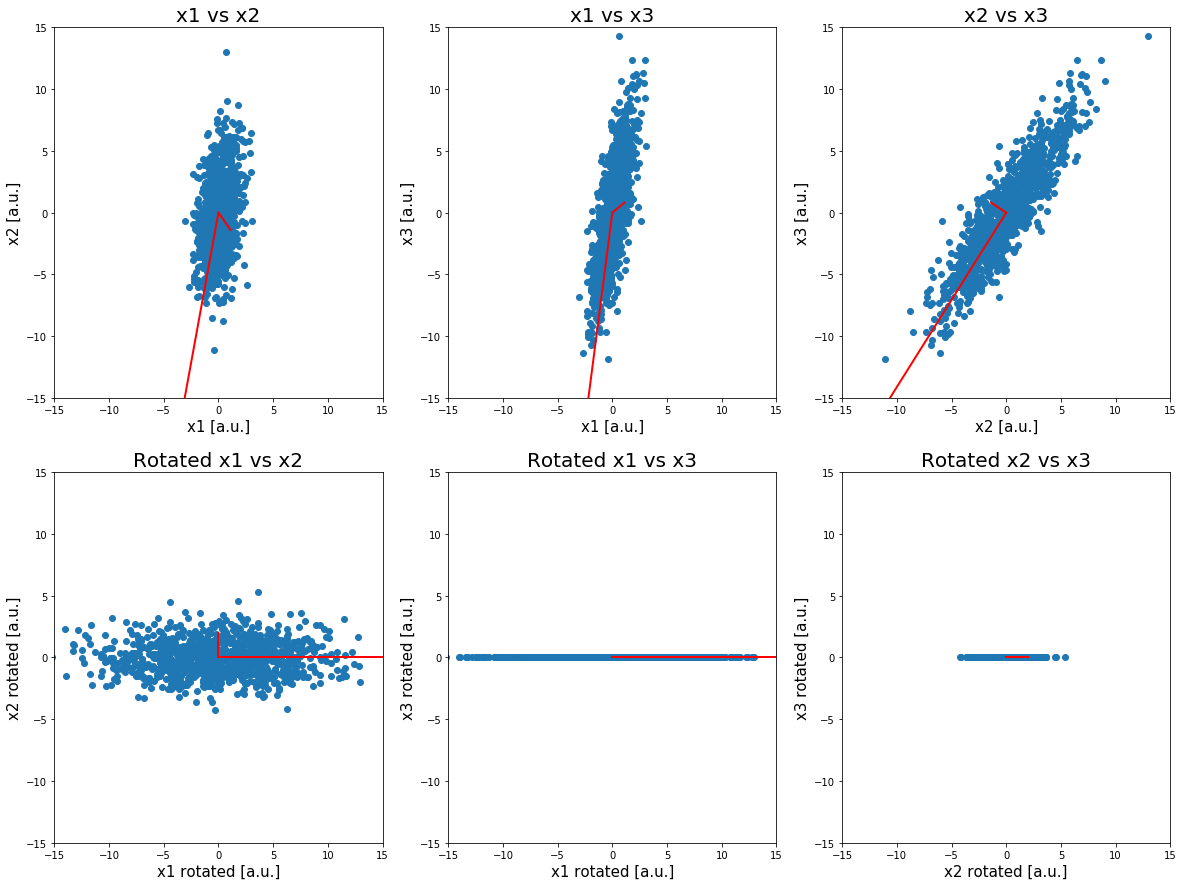

Seaborn plot
Seaborn rotated plot


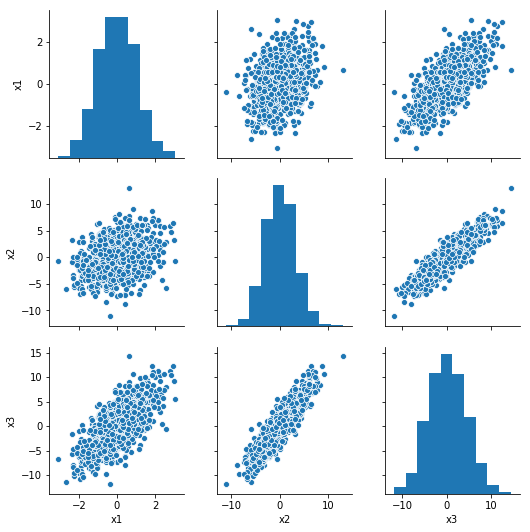

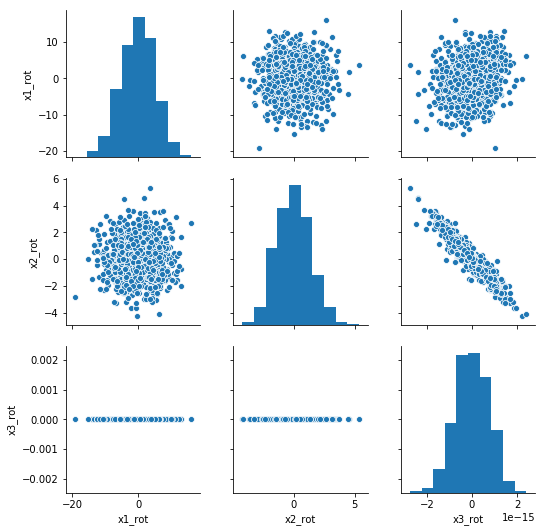

In [3]:
N = 1000
mean = 0.
std = 1.
x1 = np.random.normal(0., 1., N)
x2 = x1 + np.random.normal(0., 3., N)
x3 = 2*x1 + x2

# building the matrix to work with
x123 = np.array([x1, x2, x3])

# preparing dataframe to plot pairplot with seaborn
df_x123 = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})

# print(np.dot(x123, x123.T)/(N-1))       # Sbagliata perché non considero le medie effettive

# evaluating covariance matrix
cov_x123 = np.cov(x123)

print("Covariance matricx:\n", cov_x123, "\n")

# evaluating spectrum and eigenvectors via numpy
spectrum_np, eig_V_np = la.eig(cov_x123)

print("Spectrum is:\n", spectrum_np, "\n")
print("Eigenvectors matrix is:\n", eig_V_np, "\n")

# evaluating spectrum and eigenvectors via scipy
eig_V_sci, spectrum_sci, eig_U_sci = la.svd(cov_x123)

print("Spectrum is:\n", spectrum_sci, "\n")
print("Eigenvectors matrix is:\n", eig_V_sci, "\n")


# evaluating the percentage of the first element
perc_first = spectrum_sci.max()/np.sum(spectrum_sci)

print("Percentage of the first (greater) eigenvalue:\n", perc_first, "\n")

perc_99 = 0
i = 0

while perc_99 < 0.99:
    perc_99 += spectrum_sci[i]/np.sum(spectrum_sci)
    i += 1

# cutting the spectrum till the chosen percentage is achieved
spectrum_sci[i:] = 0

# print("New spectrum (99%) is:\n", spectrum_sci, "\n")

# rotating initial matrix
x123_rot = eig_V_sci.T.dot(x123)

# preparing rotated dataframe to plot pairplot with seaborn
df_x123_rot = pd.DataFrame({'x1_rot':x123_rot[0,:], 'x2_rot':x123_rot[1,:], 'x3_rot':x123_rot[2,:]})

print("Printing rotated data:\n", x123_rot, "\n")

# Deleting the "less significant" row
x123_rot_thresh = x123_rot[:i]         # N.B.: SVD gives a matrix with ordered eigen-vectors, so one can simply remove
                                #       remove the last rows

print(x123_rot_thresh)

fig = plt.figure(figsize=(20,15))

ax00 = plt.subplot2grid((2,3), (0,0))
ax01 = plt.subplot2grid((2,3), (0,1))
ax02 = plt.subplot2grid((2,3), (0,2))
ax10 = plt.subplot2grid((2,3), (1,0))
ax11 = plt.subplot2grid((2,3), (1,1))
ax12 = plt.subplot2grid((2,3), (1,2))

ax00.set_title('x1 vs x2', fontsize=20)
ax01.set_title('x1 vs x3', fontsize=20)
ax02.set_title('x2 vs x3', fontsize=20)



ax00.scatter(x123[0,:], x123[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax00.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[1][0]], 'r-', lw=2)
ax00.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[1][1]], 'r-', lw=2)
ax00.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-', lw=2)
ax00.set_xlabel("x1 [a.u.]", fontsize=15)
ax00.set_ylabel("x2 [a.u.]", fontsize=15)
ax00.axis([-15,15,-15,15]);


ax01.scatter(x123[0,:], x123[2,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x3) plane
ax01.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[2][0]], 'r-', lw=2)
ax01.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[2][1]], 'r-', lw=2)
ax01.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[2][2]], 'r-', lw=2)
ax01.set_xlabel("x1 [a.u.]", fontsize=15)
ax01.set_ylabel("x3 [a.u.]", fontsize=15)
ax01.axis([-15,15,-15,15]);


ax02.scatter(x123[1,:], x123[2,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x2,x3) plane
ax02.plot([0, spectrum_sci[0]*eig_V_sci[1][0]], [0, spectrum_sci[0]*eig_V_sci[2][0]], 'r-', lw=2)
ax02.plot([0, spectrum_sci[1]*eig_V_sci[1][1]], [0, spectrum_sci[1]*eig_V_sci[2][1]], 'r-', lw=2)
ax02.plot([0, spectrum_sci[2]*eig_V_sci[1][2]], [0, spectrum_sci[2]*eig_V_sci[2][2]], 'r-', lw=2)
ax02.set_xlabel("x2 [a.u.]", fontsize=15)
ax02.set_ylabel("x3 [a.u.]", fontsize=15)
ax02.axis([-15,15,-15,15]);


ax10.set_title('Rotated x1 vs x2', fontsize=20)
ax11.set_title('Rotated x1 vs x3', fontsize=20)
ax12.set_title('Rotated x2 vs x3', fontsize=20)


ax10.scatter(x123_rot[0,:], x123_rot[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) rotated plane
ax10.plot([0, spectrum_sci[0]*1], [0, spectrum_sci[0]*0], 'r-', lw=2)
ax10.plot([0, spectrum_sci[1]*0], [0, spectrum_sci[1]*1], 'r-', lw=2)
# the third eigenvector has null component on the projection over rotated x1 and x2
#ax10.plot([0, spectrum_sci[2]*1], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-')
ax10.set_xlabel("x1 rotated [a.u.]", fontsize=15)
ax10.set_ylabel("x2 rotated [a.u.]", fontsize=15)
ax10.axis([-15,15,-15,15]);


ax11.scatter(x123_rot[0,:], x123_rot[2,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x3) rotated plane
ax11.plot([0, spectrum_sci[0]*1], [0, spectrum_sci[0]*0], 'r-', lw=2)
# the second eigenvector has null component on the projection over rotated x1 and x2
#ax11.plot([0, spectrum_sci[1]*0], [0, spectrum_sci[1]*1], 'r-', lw=2)
ax11.plot([0, spectrum_sci[2]*0], [0, spectrum_sci[2]*1], 'r-', lw=2)
ax11.set_xlabel("x1 rotated [a.u.]", fontsize=15)
ax11.set_ylabel("x3 rotated [a.u.]", fontsize=15)
ax11.axis([-15,15,-15,15]);


ax12.scatter(x123_rot[1,:], x123_rot[2,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x2,x3) rotated plane
# the first eigenvector has null component on the projection over rotated x1 and x2
#ax12.plot([0, spectrum_sci[0]*1], [0, spectrum_sci[0]*0], 'r-', lw=2)
ax12.plot([0, spectrum_sci[1]*1], [0, spectrum_sci[1]*0], 'r-', lw=2)
ax12.plot([0, spectrum_sci[2]*0], [0, spectrum_sci[2]*1], 'r-', lw=2)
ax12.set_xlabel("x2 rotated [a.u.]", fontsize=15)
ax12.set_ylabel("x3 rotated [a.u.]", fontsize=15)
ax12.axis([-15,15,-15,15]);

plt.show()


print("Seaborn plot")
sns.pairplot(df_x123)
print("Seaborn rotated plot")
sns.pairplot(df_x123_rot)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before


Eigenvalues:
[2.63969737e+01+0.j 1.94721006e+00+0.j 8.03512562e-16+0.j
 4.72487312e-04+0.j 4.47051279e-04+0.j 3.35527391e-04+0.j
 3.42306317e-04+0.j 3.53935406e-04+0.j 3.75520177e-04+0.j
 3.93229091e-04+0.j 4.03010528e-04+0.j 4.08442611e-04+0.j
 4.18696765e-04+0.j]

Eigenvectors:
[[-1.18110720e-01 -5.65139803e-01  8.16496581e-01 -2.56017605e-04
  -1.06770130e-04  3.62452583e-05 -1.76423647e-04  4.35940300e-05
   1.68082176e-04  6.41938167e-05 -1.60886951e-04  1.55785718e-04
  -1.31285944e-05]
 [-5.74041512e-01  7.09795310e-01  4.08248290e-01  2.09160886e-04
   8.36773288e-05 -1.37692680e-04  2.42757025e-04 -7.99557098e-05
  -2.42178111e-04  5.34516828e-05  3.02386127e-04 -5.41646469e-05
  -4.39140618e-05]
 [-8.10262952e-01 -4.20484296e-01 -4.08248290e-01 -3.02874323e-04
  -1.29862932e-04 -6.52021637e-05 -1.10090269e-04  7.23235024e-06
   9.39862408e-05  1.81839316e-04 -1.93877755e-05  2.57406789e-04
  -7.01712505e-05]
 [ 3.77040027e-06  8.62774076e-05 -1.28686990e-16  3.76491960e-01
 

Text(0.5, 0.98, 'Paired plots of rotated data')

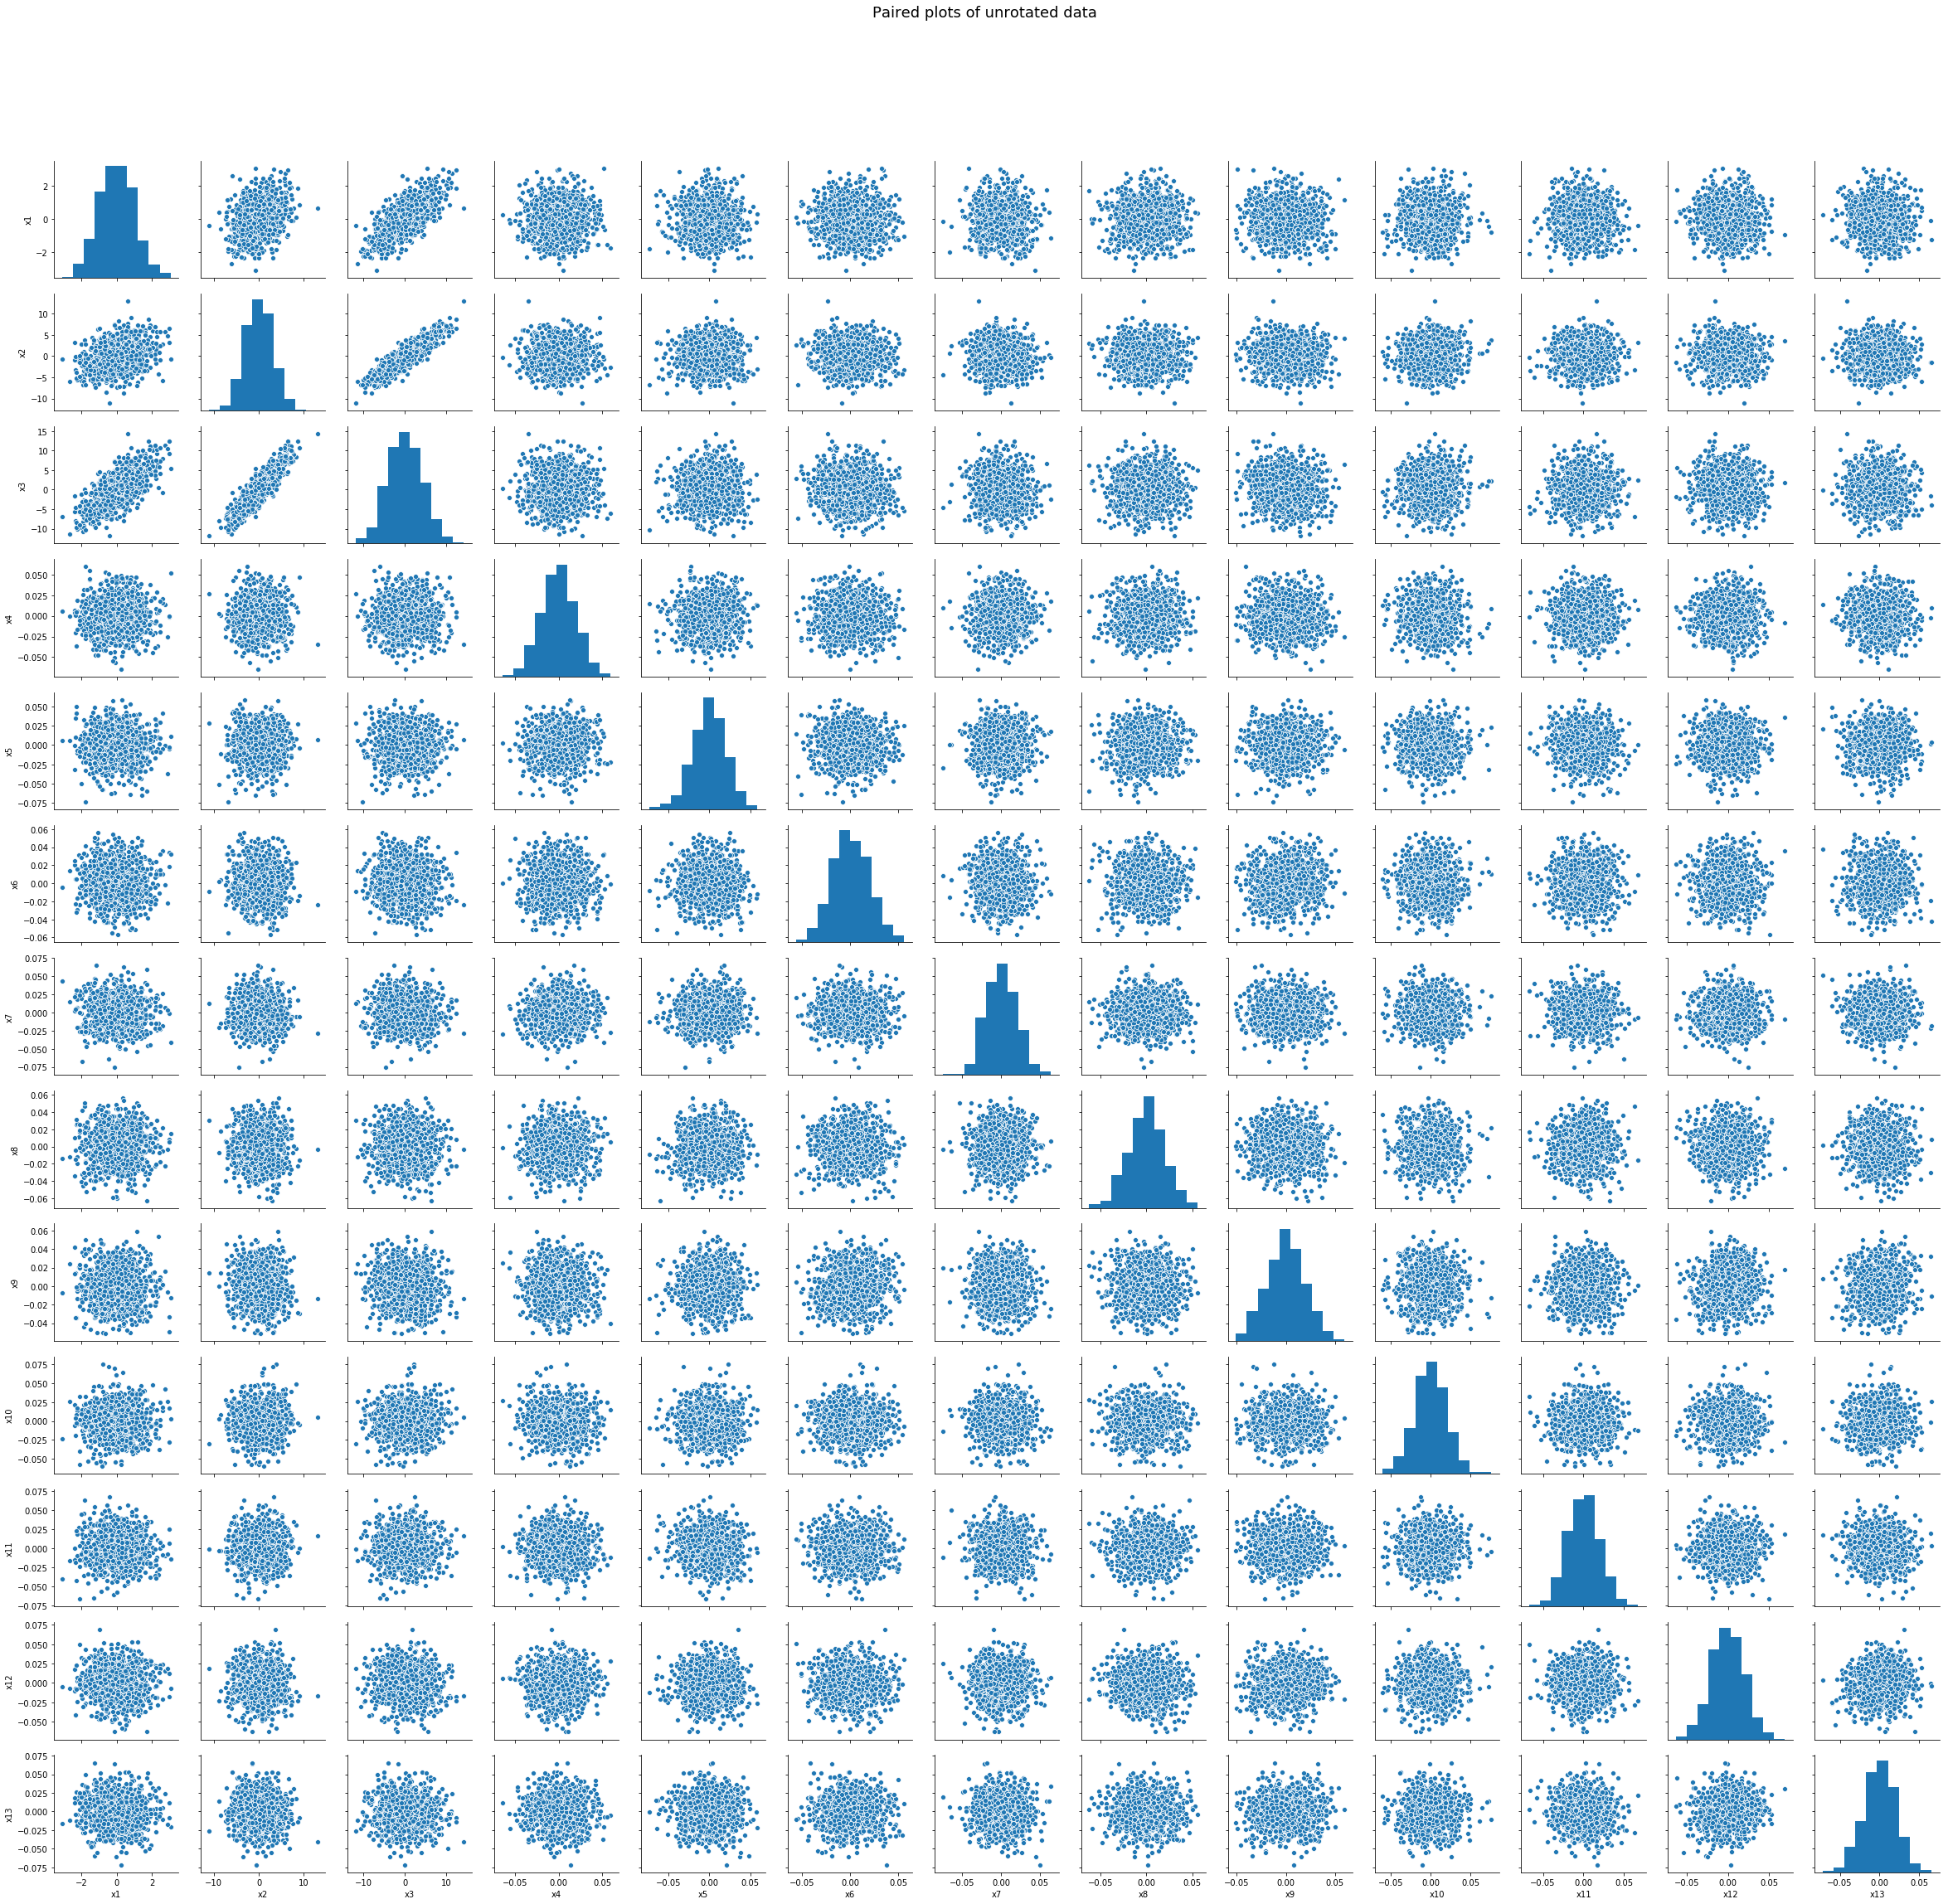

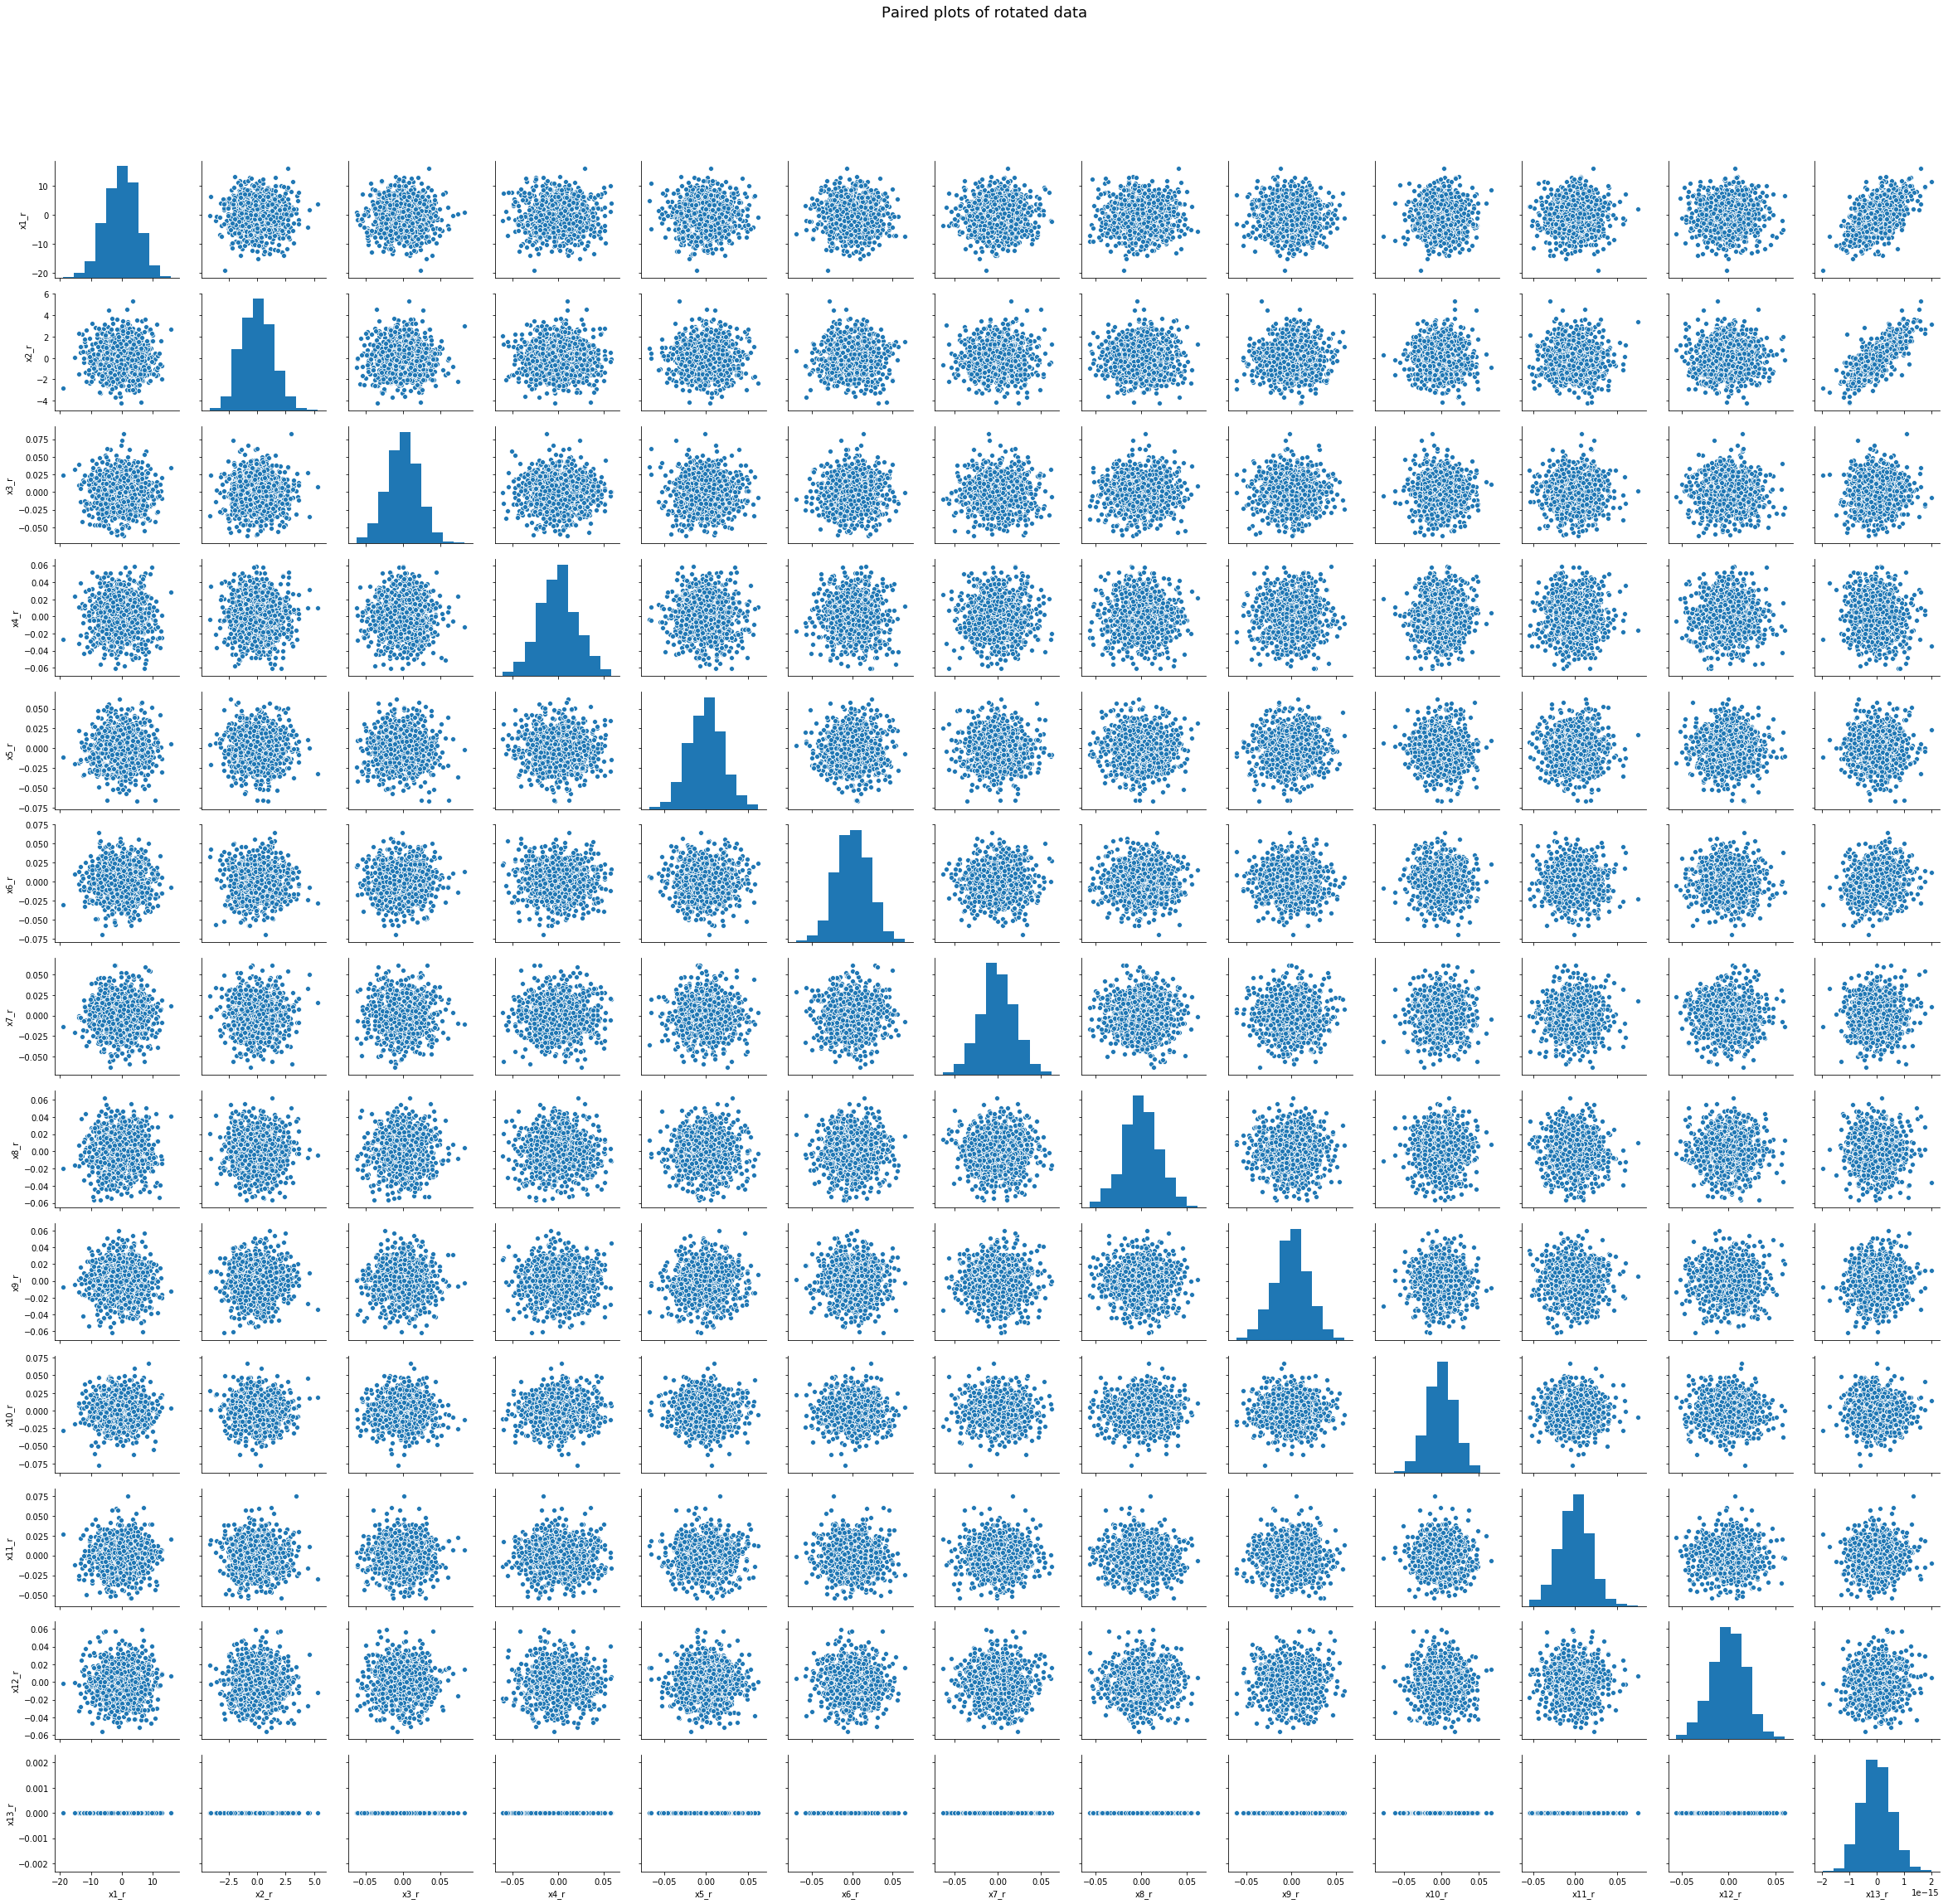

In [4]:
sigma = 1/50


x4 = np.random.normal(0,sigma,N)
x5 = np.random.normal(0,sigma,N)
x6 = np.random.normal(0,sigma,N)
x7 = np.random.normal(0,sigma,N)
x8 = np.random.normal(0,sigma,N)
x9 = np.random.normal(0,sigma,N)
x10 = np.random.normal(0,sigma,N)
x11 = np.random.normal(0,sigma,N)
x12 = np.random.normal(0,sigma,N)
x13 = np.random.normal(0,sigma,N)


data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13])



#print('Covariance matrix:')
#print(np.cov(data))

l, V = la.eig(np.cov(data))
print()
print('Eigenvalues:')
print(l)
print()
print('Eigenvectors:')
print(V)
print()
U, spectrum, Vt = la.svd(np.cov(data))

thresh = 0.99
i=0
while (spectrum[:i].sum())/(spectrum.sum())<.99:
    i+=1
    
print("The threshold is reached by summing the first ", i, "eigenvalues.\n")

#data rotation
datar = np.dot(Vt, data)
pd.DataFrame(datar)


dataclean = datar[:i]

pd.DataFrame(dataclean)

datarot = pd.DataFrame({'x1_r':datar[0,:],
                       'x2_r':datar[1,:],
                       'x3_r':datar[2,:],
                       'x4_r':datar[3,:],
                       'x5_r':datar[4,:],
                       'x6_r':datar[5,:],
                       'x7_r':datar[6,:],
                       'x8_r':datar[7,:],
                       'x9_r':datar[8,:],
                       'x10_r':datar[9,:],
                       'x11_r':datar[10,:],
                       'x12_r':datar[11,:],
                       'x13_r':datar[12,:],})

dat = pd.DataFrame({'x1':data[0,:],
                       'x2':data[1,:],
                       'x3':data[2,:],
                       'x4':data[3,:],
                       'x5':data[4,:],
                       'x6':data[5,:],
                       'x7':data[6,:],
                       'x8':data[7,:],
                       'x9':data[8,:],
                       'x10':data[9,:],
                       'x11':data[10,:],
                       'x12':data[11,:],
                       'x13':data[12,:],})


a = sns.pairplot(dat)
plt.subplots_adjust(top=0.9)
a.fig.suptitle('Paired plots of unrotated data', fontsize=18)


g = sns.pairplot(datarot)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Paired plots of rotated data', fontsize=18)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [76]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
#    fi = np.arccos(vec[2])
#    theta = vec[0]/np.sin(fi)
#    return theta, fi
    return vec

cameras = np.array(sample_spherical(10))

print(cameras)

x = np.linspace(0, 6*np.pi, 1000)

r = 1.

x_spring = np.array(r*np.cos(x))

#print(spring_motion)

spring_motion = np.array([x_spring, np.random.normal(loc=0, scale=0.1, size=1000), np.zeros(1000)])

spring_motion = spring_motion.T

data_ = np.zeros(shape=(1000, 3, 10))

print(spring_motion.shape)
print(len(cameras.T))
print(len(spring_motion))
print(len(spring_motion[1]))

for ccam in range(len(cameras.T)):
    for cmeasure in range(len(spring_motion)):
        for ccoord in range(len(spring_motion[cmeasure])):
            data_[cmeasure][ccoord][ccam] = spring_motion[cmeasure][ccoord] - np.dot(cameras.T[ccam], spring_motion[cmeasure])*spring_motion[cmeasure][ccoord]/np.norm(spring_motion[cmeasure][ccoord])

#print(data_[:,:,0].shape)

for ccam in range(len(cameras.T)):
    cov_m = np.cov((data_[:,:,ccam]).T)
    
    print(cov_m.shape)
    
    eig_V, spectrum, eig_V_T = la.svd(cov_m)
    data_rot = np.dot(eig_V_T, (data_[:,:,ccam]).T)
    
    print(data_rot.shape)
        
#    i=1
#    while np.sum(spectrum[:i])/spectrum.sum() < 0.99:
#        i += 1
#    
#    spectrum = spectrum[:i]
#    data_rot = data_rot[0:i,:]
    
    #print(data_rot[:,1].shape)
#    fot i in range(len(data_rot)):
    plt.scatter(data_rot[0,:], data_rot[1,:])
    plt.show()
    
print(data_rot)


[[ 0.62167185  0.21840535  0.07640055 -0.43097962 -0.55013132 -0.94468874
   0.51523105 -0.88154112  0.34139042 -0.7863097 ]
 [-0.75634564  0.63671281 -0.62713832 -0.1043659   0.29789549  0.32122834
   0.0818545  -0.46799081 -0.73789386  0.50787209]
 [-0.2036305   0.73952411  0.77515191 -0.89630593 -0.78013704  0.06614784
   0.85313352  0.06220807 -0.58220721  0.35182807]]
(1000, 3)
10
1000
3


AttributeError: module 'numpy' has no attribute 'norm'

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset